## Evolutionary 2x2 Games

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
B = 1
C = 1
f = 0.5

In [54]:
def dpdt(p, q, B, C, f):
    return p*(1-p) * (B*f + (C - B)*f*p + C*(1-f) + (B - C)*(1-f)*q)

def dqdt(p, q, B, C, f):
    return q*(1-q) * (B*(1-f) + (C - B)*(1-f)*q + C*f + (B - C)*f*p)

def f(p, q, B1, C1, B2, C2, f):
    u = dpdt(p, q, B1, C1, f)
    v = dqdt(p, q, B2, C2, f)
    return u, v

def fc(p, q, B1, C1, B2, C2, f):
    u = dpdt(p, q, B1, C1, f)
    return u, 0

def expected_welfare(p, q, f, r1, s1, t1, p1, r2, s2, t2, p2):
    return (
        f * ( p * (f*p*r1 + f*(1-p)*s1 + (1-f)*q*s1 + (1-f)*(1-q)*r1) +
                (1-p) * (f*p*t1 + f*(1-p)*p1 + (1-f)*q*p1 + (1-f)*(1-q)*t1)) + 
            (1-f) * ( q * ((1-f)*q*r2 + (1-f)*(1-q)*s2 + f*p*s2 + f*(1-p)*r2) +
                (1-q) * ((1-f)*q*t2 + (1-f)*(1-q)*p2 + f*p*p2 + f*(1-p)*t2))
           )

In [4]:
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
X,Y = np.meshgrid(x,y)

In [5]:
B1 = 1
C1 = 2
B2 = -1 
C2 = 0

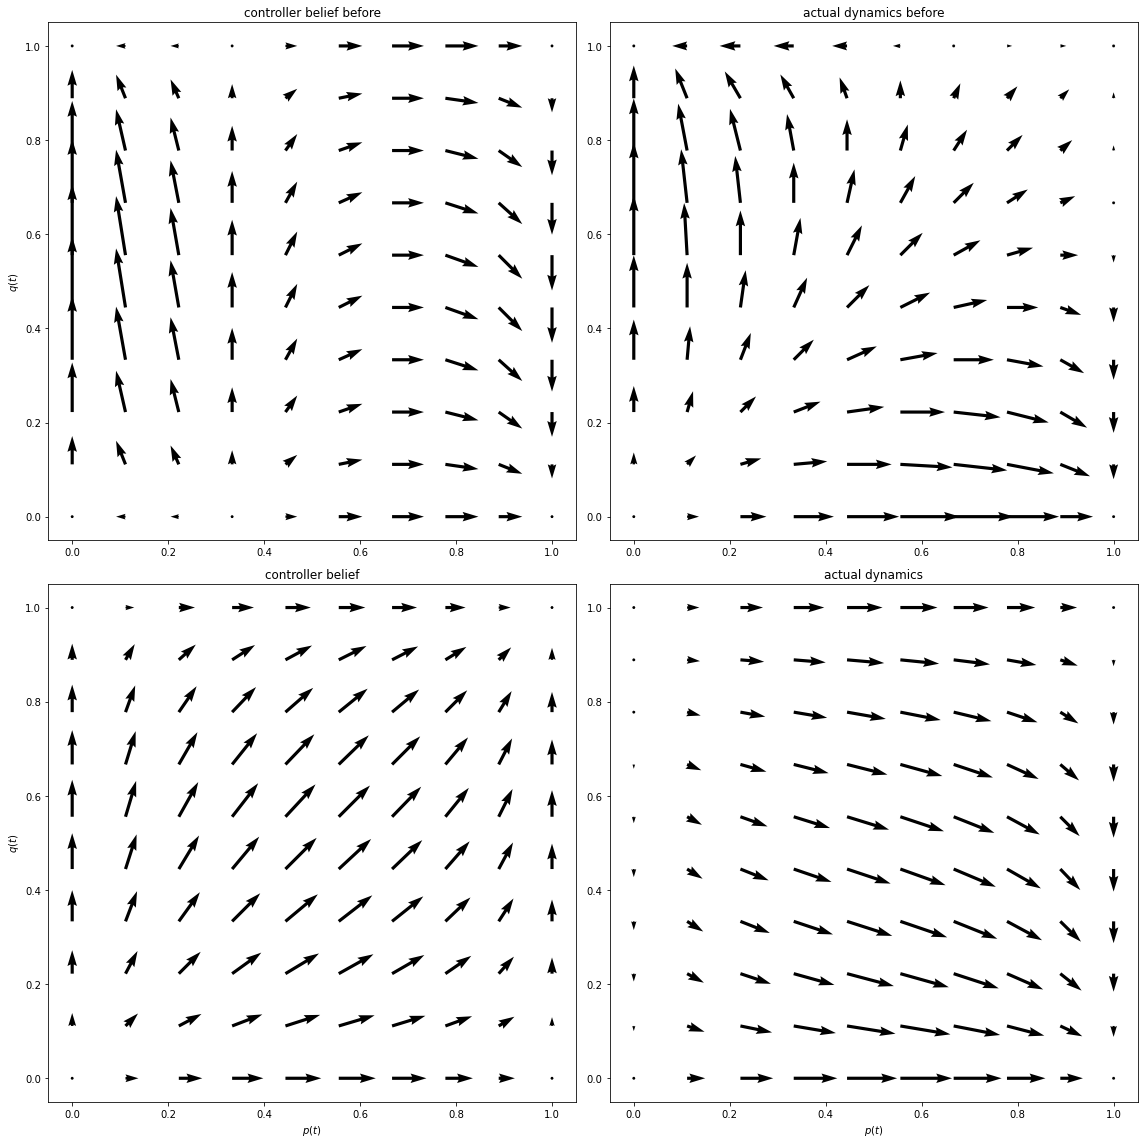

In [6]:
bU, bV = f(X, Y, -1, 2, -1, 2, 0.5)
bUc, bVc = f(X, Y, -1, 2, -1, 2, 1)
U, V = f(X, Y, B1, C1, B2, C2, 0.5)
Uc, Vc = f(X, Y, 1, 2, 1, 2, 0.5)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
ax1.quiver(X, Y, bUc, bVc)
ax2.quiver(X, Y, bU, bV)
ax3.quiver(X, Y, Uc, Vc)
ax4.quiver(X, Y, U, V)

ax1.set_ylabel(r"$q(t)$")
ax3.set_ylabel(r"$q(t)$")
ax3.set_xlabel(r"$p(t)$")
ax4.set_xlabel(r"$p(t)$")

ax1.set_title("controller belief before")
ax2.set_title("actual dynamics before")
ax3.set_title("controller belief")
ax4.set_title("actual dynamics")

plt.tight_layout()

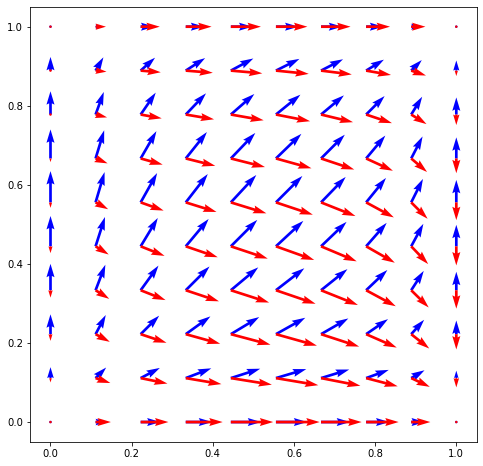

In [73]:
plt.figure(figsize=(8,8))
plt.quiver(X, Y, Uc, Vc, color="blue")
plt.quiver(X, Y, U, V, color="red")

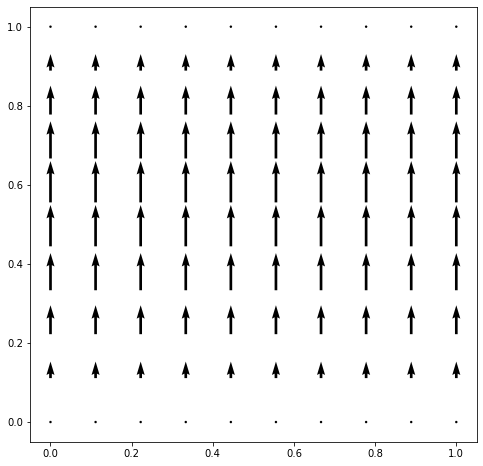

In [74]:
dU = Uc - U
dV = Vc - V

plt.figure(figsize=(8,8))
plt.quiver(X, Y, dU, dV)

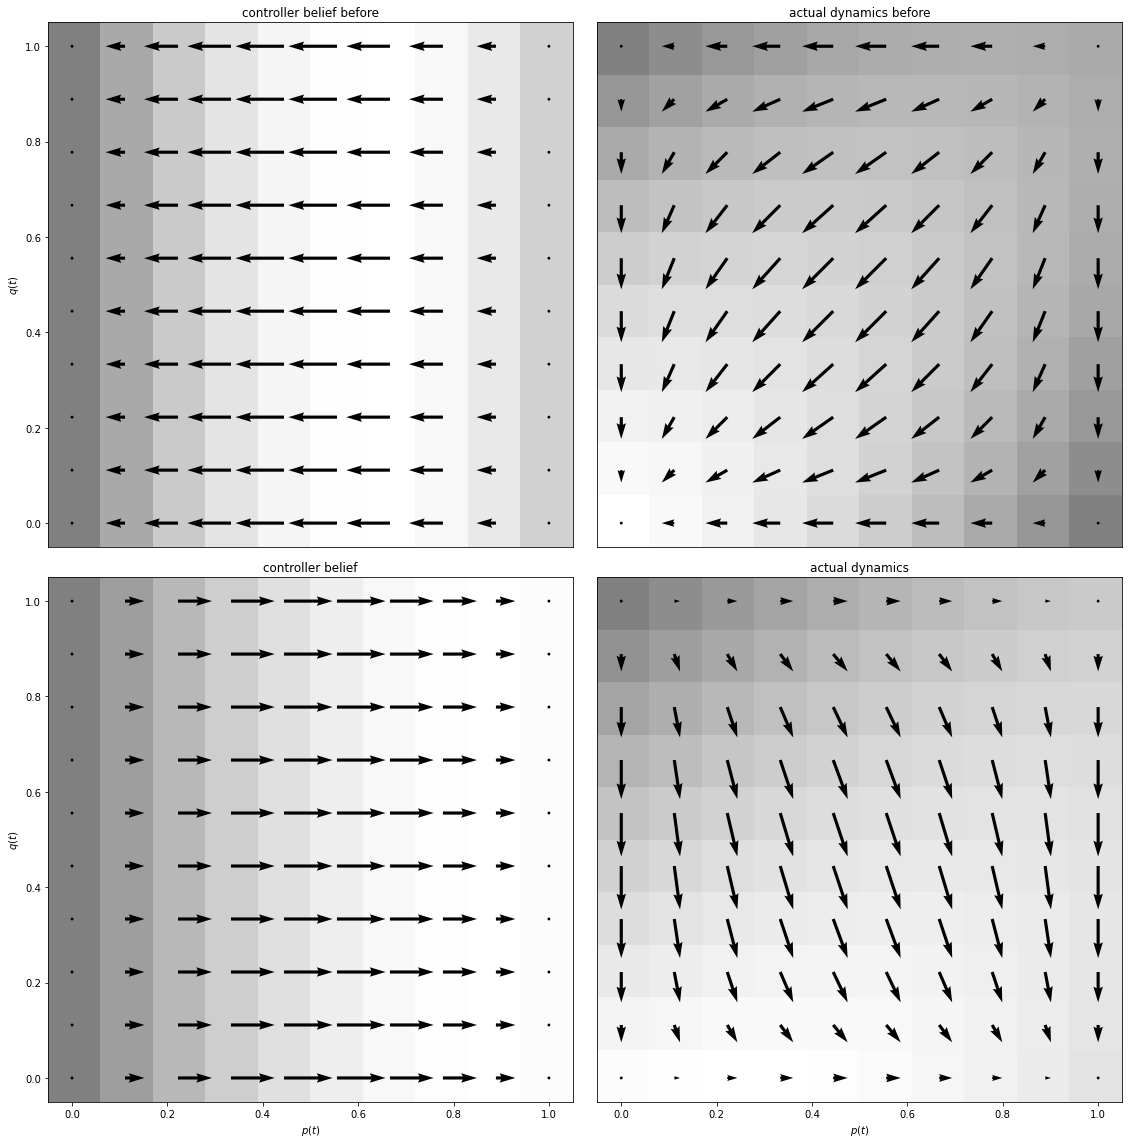

In [61]:
bU, bV = f(X, Y, -1, -1, -1, -1, 0.5)
bUc, bVc = fc(X, Y, -1, -1, -1, -1, 1)
U, V = f(X, Y, 1, 1, -3, -3, 0.5)
Uc, Vc = fc(X, Y, 1, 1, 1, 1, 1)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
plt.set_cmap("gray")
ax1.quiver(X, Y, bUc, bVc)
ax2.quiver(X, Y, bU, bV)
ax3.quiver(X, Y, Uc, Vc)
ax4.quiver(X, Y, U, V)

bW = expected_welfare(X, Y, 0.5, 1, 1, 4, 0, 1, 1, 4, 0)
bWc = expected_welfare(X, Y, 1, 1, 1, 4, 0, 1, 1, 4, 0)
Wc = expected_welfare(X, Y, 1, 1, 1, 2, -2, 1, 1, 2, -2)
W = expected_welfare(X, Y, 0.5, 1, 1, 2, -2, -1, -1, 4, 0)
ax1.imshow(bWc, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)
ax2.imshow(bW, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)
ax3.imshow(Wc, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)
ax4.imshow(W, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)

ax1.set_ylabel(r"$q(t)$")
ax3.set_ylabel(r"$q(t)$")
ax3.set_xlabel(r"$p(t)$")
ax4.set_xlabel(r"$p(t)$")

ax1.set_title("controller belief before")
ax2.set_title("actual dynamics before")
ax3.set_title("controller belief")
ax4.set_title("actual dynamics")

#ax1.set_xticks([0, 1])
#ax2.axis("off")
ax1.set_xticks([])
ax4.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.savefig("pd-hg.png")

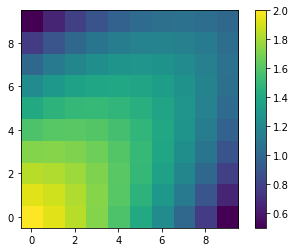

In [22]:
w = expected_welfare(X, Y, 0.5, 1, 1, 4, 0, 1, 1, 4, 0)
plt.imshow(w, origin='lower')
plt.colorbar()

In [24]:
expected_welfare(0, 0, 0.5, 1, 1, 4, 0, 1, 1, 4, 0)

2.0

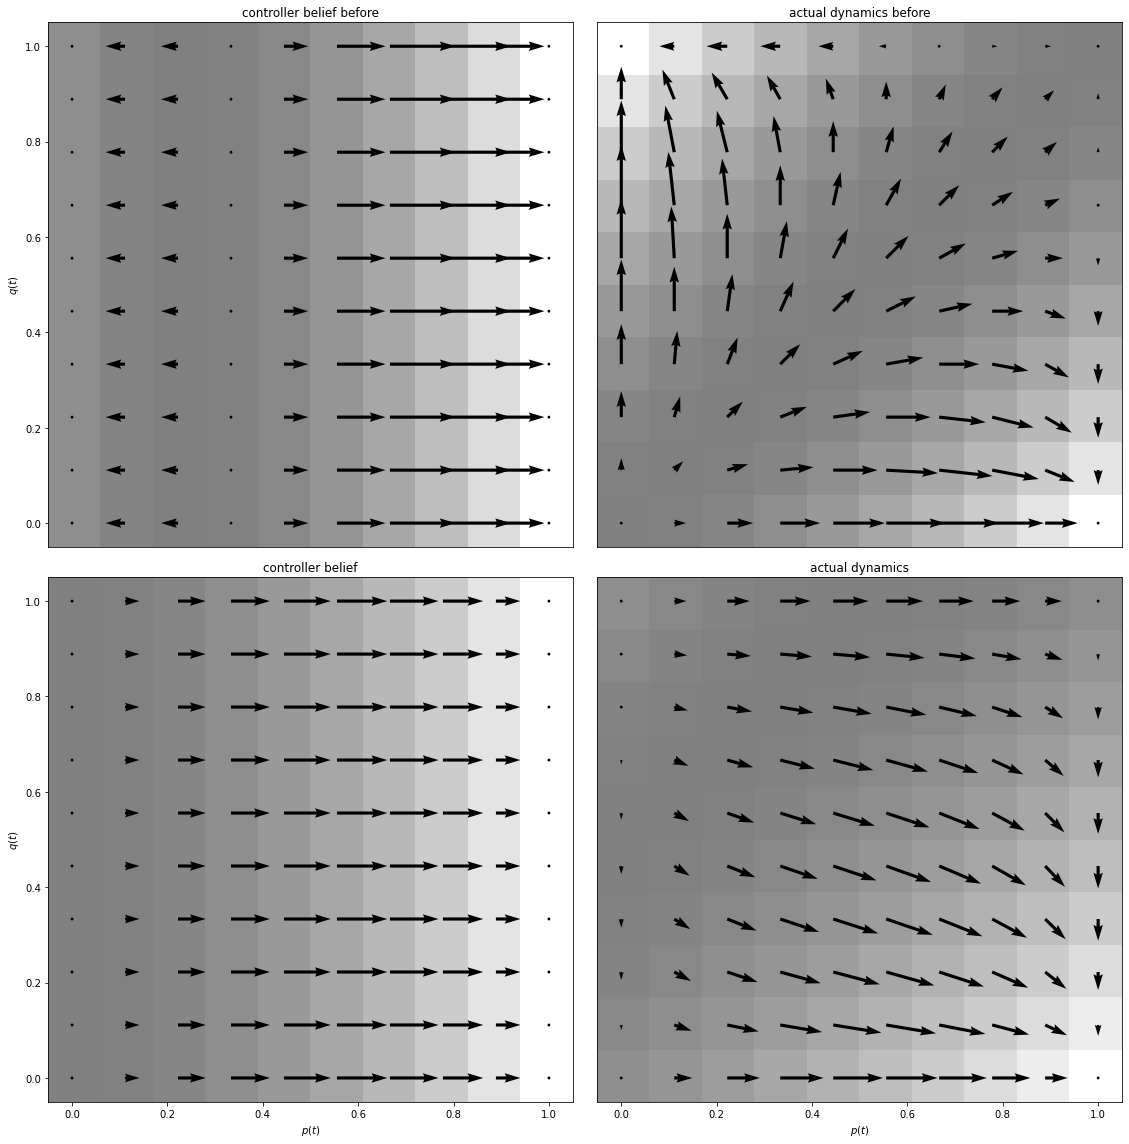

In [60]:
bU, bV = f(X, Y, -1, 2, -1, 2, 0.5)
bUc, bVc = fc(X, Y, -1, 2, -1, 2, 1)
U, V = f(X, Y, B1, C1, B2, C2, 0.5)
Uc, Vc = fc(X, Y, 1, 2, 1, 2, 1)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
plt.set_cmap("gray")
ax1.quiver(X, Y, bUc, bVc)
ax2.quiver(X, Y, bU, bV)
ax3.quiver(X, Y, Uc, Vc)
ax4.quiver(X, Y, U, V)

r = 4
s = 0
t = 2
p = 2

bW = expected_welfare(X, Y, 0.5, r, s, t, p, r, s, t, p)
bWc = expected_welfare(X, Y, 1, r, s, t, p, r, s, t, p)
Wc = expected_welfare(X, Y, 1, r, s, t-2, p-2, r, s, t-2, p-2)
W = expected_welfare(X, Y, 0.5, r, s, t-2, p-2, r-2, s-2, t, p)
ax1.imshow(bWc, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)
ax2.imshow(bW, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)
ax3.imshow(Wc, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)
ax4.imshow(W, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)

ax1.set_ylabel(r"$q(t)$")
ax3.set_ylabel(r"$q(t)$")
ax3.set_xlabel(r"$p(t)$")
ax4.set_xlabel(r"$p(t)$")

ax1.set_title("controller belief before")
ax2.set_title("actual dynamics before")
ax3.set_title("controller belief")
ax4.set_title("actual dynamics")

#ax1.set_xticks([0, 1])
#ax2.axis("off")
ax1.set_xticks([])
ax4.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.savefig("sh-hg.png")

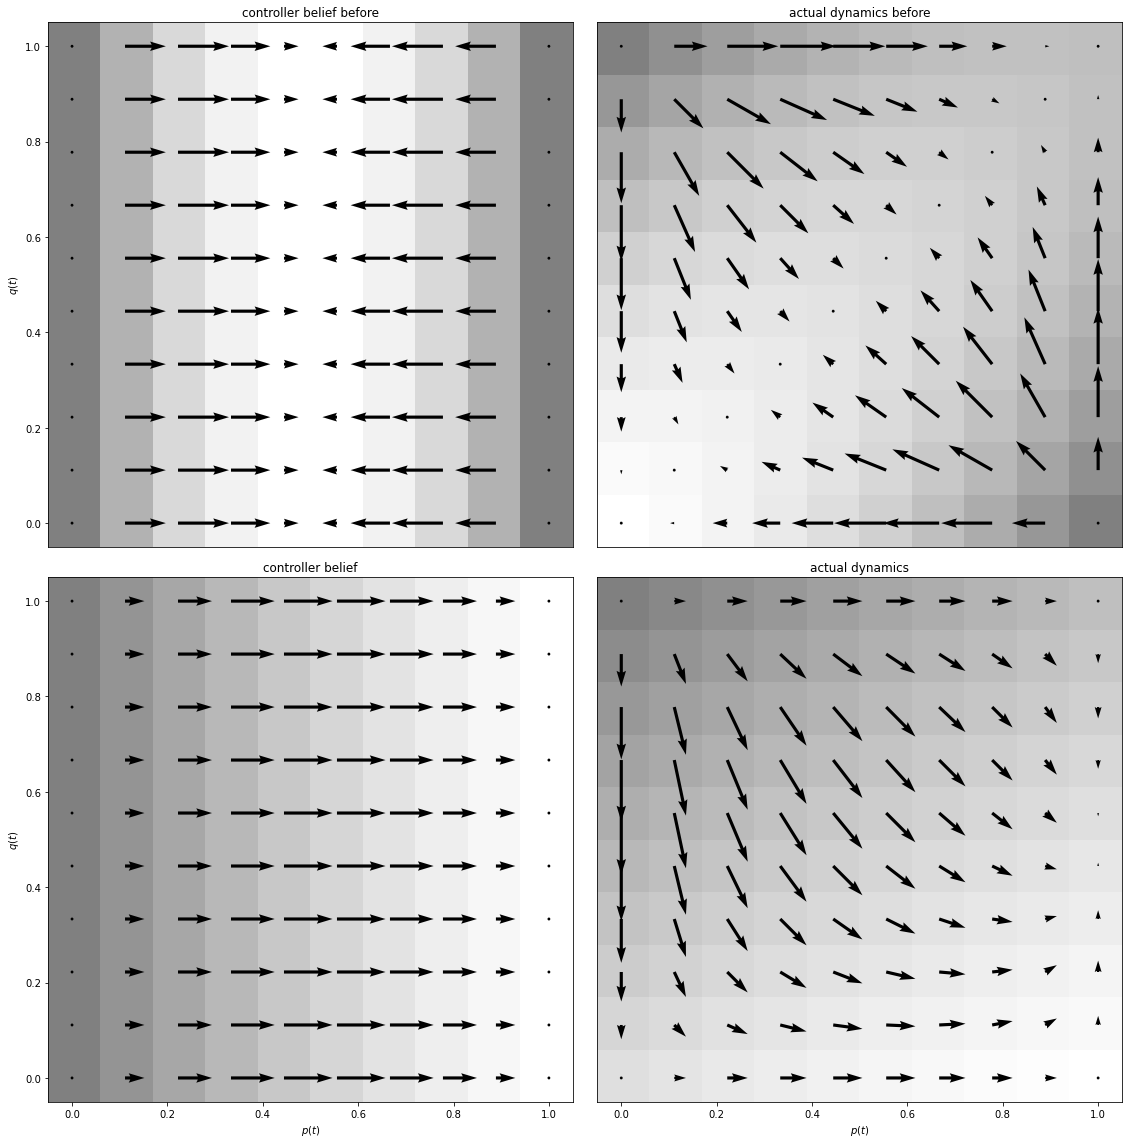

In [66]:
bU, bV = f(X, Y, 1, -1, 1, -1, 0.5)
bUc, bVc = fc(X, Y, 1, -1, 1, -1, 1)
U, V = f(X, Y, 1, 1, 1, -3, 0.5)
Uc, Vc = fc(X, Y, 1, 1, 1, 1, 1)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
plt.set_cmap("gray")
ax1.quiver(X, Y, bUc, bVc)
ax2.quiver(X, Y, bU, bV)
ax3.quiver(X, Y, Uc, Vc)
ax4.quiver(X, Y, U, V)

r = 1
s = 2
t = 3
p = 1

bW = expected_welfare(X, Y, 0.5, r, s, t, p, r, s, t, p)
bWc = expected_welfare(X, Y, 1, r, s, t, p, r, s, t, p)
Wc = expected_welfare(X, Y, 1, r+2, s, t, p, r, s, t, p+2)
W = expected_welfare(X, Y, 0.5, r+2, s, t, p, r, s, t, p+2)
ax1.imshow(bWc, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)
ax2.imshow(bW, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)
ax3.imshow(Wc, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)
ax4.imshow(W, origin='lower', extent=(-0.05, 1.05, -0.05, 1.05), alpha=0.5)

ax1.set_ylabel(r"$q(t)$")
ax3.set_ylabel(r"$q(t)$")
ax3.set_xlabel(r"$p(t)$")
ax4.set_xlabel(r"$p(t)$")

ax1.set_title("controller belief before")
ax2.set_title("actual dynamics before")
ax3.set_title("controller belief")
ax4.set_title("actual dynamics")

#ax1.set_xticks([0, 1])
#ax2.axis("off")
ax1.set_xticks([])
ax4.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.savefig("sd-hg.png")